In [1]:
#import datasets and load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import imageio
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
import warnings
import itertools






df_17=pd.read_csv('2017A.csv')
df_18=pd.read_csv('2018A.csv')
df_19=pd.read_csv('2019A.csv')
df_20=pd.read_csv('2020A.csv')
df_21=pd.read_csv('2021A.csv')
df_22=pd.read_csv('2022A.csv')
df_23=pd.read_csv('2023A.csv')
df_24=pd.read_csv('2024D.csv')
df_25=pd.read_csv('2025A.csv')



print(df_17.head(30))
print(df_17.tail())

   Payroll[Org] Payroll[CC]  Payroll[Subj]  Payroll[S1]  Payroll[S2]  \
0             A     S526400            151            0            0   
1             A     L421199            151            0            0   
2             A     S402000            151            0            0   
3             A     L242103            151            0            0   
4             A     S403000            969            0            0   
5             A     L110099            151            0            0   
6             A     S401000            151            0            0   
7             A     S403000            151            0            0   
8             A     S216401            151            0            0   
9             A     L041703            111            0            0   
10            A     S216210            111            0            0   
11            A     S432003            431            0            0   
12            A     L331300            151            0         

In [2]:
df_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217178 entries, 0 to 217177
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Payroll[Org]            217178 non-null  object 
 1   Payroll[CC]             217178 non-null  object 
 2   Payroll[Subj]           217178 non-null  int64  
 3   Payroll[S1]             217178 non-null  int64  
 4   Payroll[S2]             217178 non-null  int64  
 5   Payroll[Reference]      217178 non-null  object 
 6   Payroll[Employee Num]   217178 non-null  int64  
 7   Payroll[Employee Name]  217178 non-null  object 
 8   Payroll[Payroll Group]  217178 non-null  object 
 9   Payroll[Pay Period]     217178 non-null  int64  
 10  Payroll[Element]        217178 non-null  object 
 11  Payroll[Hours]          216187 non-null  float64
 12  Payroll[Job & Home CC]  217170 non-null  object 
 13  Payroll[Period]         217178 non-null  object 
 14  Calendar[Year]      

In [3]:
df_23.rename(columns={
    'Payroll[Org]': 'Org',
    'Payroll[CC]': 'CC',
    'Payroll[Subj]': 'Subj',
    'Payroll[S1]': 'S1',
    'Payroll[S2]': 'S2',
    'Payroll[Reference]': 'Reference',
    'Payroll[Employee Num]': 'Employee Num',
    'Payroll[Employee Name]': 'Employee Name',
    'Payroll[Payroll Group]': 'Payroll Group',
    'Payroll[Element]': 'Element',
    'Payroll[Hours]': 'Hours',
    'Payroll[Job & Home CC]': 'Job & Home CC',
    'Payroll[Period]': 'Period',
    'Calendar[Year]': 'Year',
    '[SumAmount]': 'Amount'
}, inplace=True)

df_24.rename(columns={
    'Payroll[Org]': 'Org',
    'Payroll[CC]': 'CC',
    'Payroll[Subj]': 'Subj',
    'Payroll[S1]': 'S1',
    'Payroll[S2]': 'S2',
    'Payroll[Reference]': 'Reference',
    'Payroll[Employee Num]': 'Employee Num',
    'Payroll[Employee Name]': 'Employee Name',
    'Payroll[Payroll Group]': 'Payroll Group',
    'Payroll[Element]': 'Element',
    'Payroll[Hours]': 'Hours',
    'Payroll[Job & Home CC]': 'Job & Home CC',
    'Payroll[Period]': 'Period',
    'Calendar[Year]': 'Year',
    '[SumAmount]': 'Amount'
}, inplace=True)

df_25.rename(columns={
    'Payroll[Org]': 'Org',
    'Payroll[CC]': 'CC',
    'Payroll[Subj]': 'Subj',
    'Payroll[S1]': 'S1',
    'Payroll[S2]': 'S2',
    'Payroll[Reference]': 'Reference',
    'Payroll[Employee Num]': 'Employee Num',
    'Payroll[Employee Name]': 'Employee Name',
    'Payroll[Payroll Group]': 'Payroll Group',
    'Payroll[Element]': 'Element',
    'Payroll[Hours]': 'Hours',
    'Payroll[Job & Home CC]': 'Job & Home CC',
    'Payroll[Period]': 'Period',
    'Calendar[Year]': 'Year',
    '[SumAmount]': 'Amount'
}, inplace=True)

df_17.rename(columns={
    'Payroll[Org]': 'Org',
    'Payroll[CC]': 'CC',
    'Payroll[Subj]': 'Subj',
    'Payroll[S1]': 'S1',
    'Payroll[S2]': 'S2',
    'Payroll[Reference]': 'Reference',
    'Payroll[Employee Num]': 'Employee Num',
    'Payroll[Employee Name]': 'Employee Name',
    'Payroll[Payroll Group]': 'Payroll Group',
    'Payroll[Element]': 'Element',
    'Payroll[Hours]': 'Hours',
    'Payroll[Job & Home CC]': 'Job & Home CC',
    'Payroll[Period]': 'Period',
    'Calendar[Year]': 'Year',
    '[SumAmount]': 'Amount'
}, inplace=True)

df_18.rename(columns={
    'Payroll[Org]': 'Org',
    'Payroll[CC]': 'CC',
    'Payroll[Subj]': 'Subj',
    'Payroll[S1]': 'S1',
    'Payroll[S2]': 'S2',
    'Payroll[Reference]': 'Reference',
    'Payroll[Employee Num]': 'Employee Num',
    'Payroll[Employee Name]': 'Employee Name',
    'Payroll[Payroll Group]': 'Payroll Group',
    'Payroll[Element]': 'Element',
    'Payroll[Hours]': 'Hours',
    'Payroll[Job & Home CC]': 'Job & Home CC',
    'Payroll[Period]': 'Period',
    'Calendar[Year]': 'Year',
    '[SumAmount]': 'Amount'
}, inplace=True)

df_19.rename(columns={
    'Payroll[Org]': 'Org',
    'Payroll[CC]': 'CC',
    'Payroll[Subj]': 'Subj',
    'Payroll[S1]': 'S1',
    'Payroll[S2]': 'S2',
    'Payroll[Reference]': 'Reference',
    'Payroll[Employee Num]': 'Employee Num',
    'Payroll[Employee Name]': 'Employee Name',
    'Payroll[Payroll Group]': 'Payroll Group',
    'Payroll[Element]': 'Element',
    'Payroll[Hours]': 'Hours',
    'Payroll[Job & Home CC]': 'Job & Home CC',
    'Payroll[Period]': 'Period',
    'Calendar[Year]': 'Year',
    '[SumAmount]': 'Amount'
}, inplace=True)

df_20.rename(columns={
    'Payroll[Org]': 'Org',
    'Payroll[CC]': 'CC',
    'Payroll[Subj]': 'Subj',
    'Payroll[S1]': 'S1',
    'Payroll[S2]': 'S2',
    'Payroll[Reference]': 'Reference',
    'Payroll[Employee Num]': 'Employee Num',
    'Payroll[Employee Name]': 'Employee Name',
    'Payroll[Payroll Group]': 'Payroll Group',
    'Payroll[Element]': 'Element',
    'Payroll[Hours]': 'Hours',
    'Payroll[Job & Home CC]': 'Job & Home CC',
    'Payroll[Period]': 'Period',
    'Calendar[Year]': 'Year',
    '[SumAmount]': 'Amount'
}, inplace=True)

df_21.rename(columns={
    'Payroll[Org]': 'Org',
    'Payroll[CC]': 'CC',
    'Payroll[Subj]': 'Subj',
    'Payroll[S1]': 'S1',
    'Payroll[S2]': 'S2',
    'Payroll[Reference]': 'Reference',
    'Payroll[Employee Num]': 'Employee Num',
    'Payroll[Employee Name]': 'Employee Name',
    'Payroll[Payroll Group]': 'Payroll Group',
    'Payroll[Element]': 'Element',
    'Payroll[Hours]': 'Hours',
    'Payroll[Job & Home CC]': 'Job & Home CC',
    'Payroll[Period]': 'Period',
    'Calendar[Year]': 'Year',
    '[SumAmount]': 'Amount'
}, inplace=True)

df_22.rename(columns={
    'Payroll[Org]': 'Org',
    'Payroll[CC]': 'CC',
    'Payroll[Subj]': 'Subj',
    'Payroll[S1]': 'S1',
    'Payroll[S2]': 'S2',
    'Payroll[Reference]': 'Reference',
    'Payroll[Employee Num]': 'Employee Num',
    'Payroll[Employee Name]': 'Employee Name',
    'Payroll[Payroll Group]': 'Payroll Group',
    'Payroll[Element]': 'Element',
    'Payroll[Hours]': 'Hours',
    'Payroll[Job & Home CC]': 'Job & Home CC',
    'Payroll[Period]': 'Period',
    'Calendar[Year]': 'Year',
    '[SumAmount]': 'Amount'
}, inplace=True)


In [4]:

#if i want to see output not truncated add this:df.infor()
pd.set_option('display.max_rows', None)       # Show all rows
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', None)          # Prevent line wrapping
pd.set_option('display.max_colwidth', None)   #show full column content

In [5]:
dfs = [df_17, df_18, df_19, df_20, df_21, df_22, df_23, df_24, df_25]
for df in dfs:
    # Extract the first 4 digits from the Year string
    df['Year'] = df['Year'].str.slice(0, 4)

df = pd.concat(dfs, ignore_index=True)

print(df.head())

  Org       CC  Subj  S1  S2         Reference  Employee Num   Employee Name  \
0   A  S526400   151   0   0  Local Government     2518086.0  Maria Christie   
1   A  L421199   151   0   0  Local Government     2572449.0     Angie Lewis   
2   A  S402000   151   0   0  Local Government     4516087.0      Karen King   
3   A  L242103   151   0   0  Local Government     1517051.0   Gillian Adams   
4   A  S403000   969   0   0  Local Government     1516255.0    Linda Singer   

  Payroll Group  Payroll[Pay Period]                     Element   Hours  \
0        AS0100                  8.0               001 Basic Pay    0.00   
1        AS0100                 10.0               001 Basic Pay    0.00   
2        AS0100                 12.0               001 Basic Pay  157.63   
3        AS0100                 12.0               001 Basic Pay  157.63   
4        AS0100                  5.0  062 Redundancy Non Taxable    0.00   

                                                              

In [6]:
df[['Amount']].head(20)


,Amount
0,17373.43
1,12282.32
2,11109.43
3,11066.32
4,9787.81
5,9683.10
6,8847.90
7,8847.90
8,8760.90
9,7685.88


In [7]:
#making negative values (that int he og dataset are in brackets) show as negative
df['Amount'] = (
    df['Amount']
    .astype(str)
    .str.replace(r'\((.*?)\)', r'-\1', regex=True)  # Convert (100) → -100
    .astype(float)  # Convert to float
)


In [8]:
df[['Amount']].head(20)


,Amount
0,17373.43
1,12282.32
2,11109.43
3,11066.32
4,9787.81
5,9683.10
6,8847.90
7,8847.90
8,8760.90
9,7685.88


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725389 entries, 0 to 1725388
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Org                  object 
 1   CC                   object 
 2   Subj                 int64  
 3   S1                   int64  
 4   S2                   int64  
 5   Reference            object 
 6   Employee Num         float64
 7   Employee Name        object 
 8   Payroll Group        object 
 9   Payroll[Pay Period]  float64
 10  Element              object 
 11  Hours                float64
 12  Job & Home CC        object 
 13  Period               object 
 14  Year                 object 
 15  Amount               float64
dtypes: float64(4), int64(3), object(9)
memory usage: 210.6+ MB


In [10]:
# Frequency of each 'ref', sorted from least to most
ref_counts_sorted = df['Reference'].value_counts().sort_values()
print(ref_counts_sorted)



Reference
Transfer Colleen Howath Salary April -Dec 19 < L330099                                                                                              1
Transfer Rachael Hicks Salary April -Dec 19 < L330099                                                                                               1
Transfer Colleen Howath Supn April -Dec 19 < L330099                                                                                                1
Payroll Correction from A.S351000.0151.0000.0 to A.L421700.0151.0000.0 - MHO increased pay element Apr-19 - Mar-20                                  1
Transfer Rachael Hicks Supn April -Dec 19 < L330099                                                                                                 1
Payroll Correction From A.E611001.0367.0000.0 to A.L321500.0437.0000.0                                                                              1
Payroll Correction From A.E611001.0366.0000.0 to A.L321500.0436.0000.0                    

In [11]:
#dropping columns Year S1 S2
df= df.drop(columns=[ 'S1','Org', 'S2',])

In [12]:
##df stats
print(df.describe())

               Subj  Employee Num  Payroll[Pay Period]         Hours  \
count  1.725389e+06  1.725327e+06         1.725366e+06  1.712347e+06   
mean   4.379955e+02  3.059293e+06         6.611772e+00  8.810259e+00   
std    5.716950e+02  1.184918e+06         3.492565e+00  2.433475e+01   
min    1.100000e+01  1.100008e+06         1.000000e+00 -2.166000e+03   
25%    1.560000e+02  1.597739e+06         4.000000e+00  0.000000e+00   
50%    4.320000e+02  2.599962e+06         7.000000e+00  0.000000e+00   
75%    4.320000e+02  3.597108e+06         1.000000e+01  6.000000e+00   
max    9.816000e+03  3.009202e+07         1.200000e+01  7.983720e+03   

             Amount  
count  1.725389e+06  
mean   3.294116e+02  
std    3.815515e+04  
min   -2.484477e+07  
25%    1.629000e+01  
50%    1.075000e+02  
75%    3.105000e+02  
max    2.563923e+07  


In [13]:
#df info (dtype, columns, entries etc)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725389 entries, 0 to 1725388
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   CC                   object 
 1   Subj                 int64  
 2   Reference            object 
 3   Employee Num         float64
 4   Employee Name        object 
 5   Payroll Group        object 
 6   Payroll[Pay Period]  float64
 7   Element              object 
 8   Hours                float64
 9   Job & Home CC        object 
 10  Period               object 
 11  Year                 object 
 12  Amount               float64
dtypes: float64(4), int64(1), object(8)
memory usage: 171.1+ MB
None


In [14]:
#checking for nulls
df.isnull().sum()

CC                         0
Subj                       0
Reference                 22
Employee Num              62
Employee Name             23
Payroll Group             23
Payroll[Pay Period]       23
Element                   23
Hours                  13042
Job & Home CC           6934
Period                     0
Year                       0
Amount                     0
dtype: int64

In [15]:
#dropping all nulls except for those in hours and job &home cc
df=df.dropna(subset=df.columns.difference(["Hours", "Job & Home CC"]))

df.isnull().sum()

CC                         0
Subj                       0
Reference                  0
Employee Num               0
Employee Name              0
Payroll Group              0
Payroll[Pay Period]        0
Element                    0
Hours                  13017
Job & Home CC           6911
Period                     0
Year                       0
Amount                     0
dtype: int64

In [16]:
#changing columns names so they are easier to type
df.columns= ['cc', 'subj', 'reference', 'employeenum', 'employeename', 'payrollgroup', 'payperiod', 'element', 'hours', 'job', 'period', 'year', 'amount']


In [17]:
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')


In [18]:
#filling nulls in job columns with 'no description'
df['job'] = df['job'].fillna('no description')


In [19]:
#checking for remaining nulls
df.isnull().sum()

cc                  0
subj                0
reference           0
employeenum         0
employeename        0
payrollgroup        0
payperiod           0
element             0
hours           13017
job                 0
period              0
year                0
amount              0
dtype: int64

In [20]:
#sorting by hours to see whats up with the nulls in hours
df_sorted = df.sort_values(by='hours', ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_sorted.tail(100))


              cc  subj  \
1665428  L091722   437   
1665429  L091722   436   
1665430  L091722   437   
1665432  L091722   432   
1665486  L091722   151   
1665487  L091722   151   
1665488  L091722   431   
1665489  L091722   431   
1665490  L091722   431   
1665599  L091722   437   
1665872  L091722   436   
1666578  L210099  3001   
1670596  L091722   154   
1670671  L091722   434   
1671127  L091722   154   
1671760  L091722   156   
1672208  L091722   434   
1673086  L091722   154   
1674638  L091722   156   
1675597  L091722   157   
1676893  L091722   154   
1676929  L091722   154   
1676931  L091722   434   
1676934  L140099   154   
1677734  L091722   434   
1677764  L091722   154   
1677765  L091722   154   
1678616  L091722   436   
1678702  L091722   436   
1679143  L091722   434   
1681124  L091722   154   
1681126  L091722   434   
1681128  L111200   154   
1681133  L380099   154   
1681314  L091722   437   
1681434  L091722   154   
1681928  L091722   154   
1682250  L09

In [21]:
#  fill hours null with 0.0 because of issues with uploading time sheets from itrent
#  to oracle a lot of the info in 'hours' is missing but it wont be necessary anyway so its fine
df['hours'] = df['hours'].fillna(0)
print(df.tail(30))

              cc  subj         reference  employeenum     employeename  \
1725359  L131100   151  Local Government    3518318.0  Jennifer Walker   
1725360  L242102   151  Local Government    1517106.0      Dawn Leslie   
1725361  L242102   151  Local Government    1517106.0      Dawn Leslie   
1725362  L242102   151  Local Government    1517106.0      Dawn Leslie   
1725363  L242102   151  Local Government    1517106.0      Dawn Leslie   
1725364  L530099   151  Local Government    1517390.0     Diane Hastie   
1725365  L041100   111  Local Government    3579418.0   Shona Campbell   
1725366  L041100   111  Local Government    3579418.0   Shona Campbell   
1725367  L041100   111  Local Government    3579418.0   Shona Campbell   
1725368  L101100    11  Local Government    1583622.0        Jeff Shaw   
1725369  L101100    11  Local Government    1583622.0        Jeff Shaw   
1725370  L101100    11  Local Government    1583622.0        Jeff Shaw   
1725371  L101100    11  Local Governme

In [22]:
#unique pay period entries
df['payperiod'].unique()


array([ 8., 10., 12.,  5.,  7.,  6.,  1.,  2.,  9., 11.,  4.,  3.])

In [23]:
df['payrollgroup'].unique()


array(['AS0100', 'AS0087', 'AS0030', '"AS0100"', 'EB0009', 'AS0145',
       'AS0135', 'AS0125', 'AS0115', 'AS0092'], dtype=object)

In [24]:
#funtion for monthly grand total for all time
def monthly_grand_total(df):
    # Ensure 'amount' is numeric
    df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
    
    # Group by month and sum the amounts
    monthly_total = df.groupby('payperiod')['amount'].sum()
    
    # Sort by month number (01 to 12)
    monthly_total = monthly_total.sort_index()
    
    return monthly_total
print(monthly_grand_total(df))


payperiod
1.0     49040176.75
2.0     49502343.41
3.0     49710120.96
4.0     50195816.21
5.0     43816906.60
6.0     43877744.01
7.0     46036651.49
8.0     51368904.90
9.0     44696628.13
10.0    46020230.44
11.0    47533689.63
12.0    46578927.96
Name: amount, dtype: float64


In [25]:
#info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1725326 entries, 0 to 1725388
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   cc            object 
 1   subj          int64  
 2   reference     object 
 3   employeenum   float64
 4   employeename  object 
 5   payrollgroup  object 
 6   payperiod     float64
 7   element       object 
 8   hours         float64
 9   job           object 
 10  period        object 
 11  year          Int64  
 12  amount        float64
dtypes: Int64(1), float64(4), int64(1), object(7)
memory usage: 185.9+ MB
None


In [26]:
#check for duplicares
df.duplicated().sum()


np.int64(0)

In [27]:
print(df[df['amount'] < 0].head(10))


             cc  subj         reference  employeenum          employeename  \
176331  L041702   111  Local Government    3517747.0         Alison McCann   
176332  L041702   111  Local Government    4590840.0        Suzanne Duthie   
176333  L041702   111  Local Government    4590840.0        Suzanne Duthie   
176334  L611501   151  Local Government    1570713.0      Sopheus De Zeeuw   
176335  L121500   151  Local Government    2571598.0            Karen King   
176336  L111302   431  Local Government    1578667.0     Sara Eleanor Lamb   
176337  L131500   431  Local Government    3504069.0  Marjorie Cruickshank   
176338  L211450   151  Local Government    3566821.0         Glenda McEwan   
176339  L211450   151  Local Government    3566821.0         Glenda McEwan   
176340  L211501  3001  Local Government    3570577.0          Julie Rennie   

       payrollgroup  payperiod                element  hours  \
176331       AS0100       11.0          001 Basic Pay    0.0   
176332       

In [28]:
#yay no more nulls!
df.isnull().sum()

cc              0
subj            0
reference       0
employeenum     0
employeename    0
payrollgroup    0
payperiod       0
element         0
hours           0
job             0
period          0
year            0
amount          0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1725326 entries, 0 to 1725388
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   cc            object 
 1   subj          int64  
 2   reference     object 
 3   employeenum   float64
 4   employeename  object 
 5   payrollgroup  object 
 6   payperiod     float64
 7   element       object 
 8   hours         float64
 9   job           object 
 10  period        object 
 11  year          Int64  
 12  amount        float64
dtypes: Int64(1), float64(4), int64(1), object(7)
memory usage: 185.9+ MB


In [30]:
#monthly totals for each month and year
# First, convert string values to float
df['payperiod'] = df['payperiod'].astype(float)

# Then convert float to integer (now safe)
df['payperiod'] = df['payperiod'].astype(int)

amount_month= df.groupby(['year','payperiod'])['amount'].sum()
print(amount_month)

year  payperiod
2017  1             3567960.77
      2             3710742.39
      3             3734181.91
      4             4446153.29
      5             4591707.72
      6             4881902.24
      7             4638765.90
      8             4802090.10
      9             4630351.26
      10            4786133.39
      11            4647903.62
      12            4538161.37
2018  1             4570697.47
      2             4736929.73
      3             4666507.67
      4             4538300.60
      5             4707311.10
      6             4585951.29
      7             4725749.33
      8             4577072.59
      9             4548852.44
      10            4728562.09
      11            4544979.59
      12            6447303.80
2019  1             4902417.07
      2             4893473.38
      3             4887766.30
      4             4943082.03
      5             4939866.91
      6             4880181.37
      7             5033701.42
      8             493

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1725326 entries, 0 to 1725388
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   cc            object 
 1   subj          int64  
 2   reference     object 
 3   employeenum   float64
 4   employeename  object 
 5   payrollgroup  object 
 6   payperiod     int64  
 7   element       object 
 8   hours         float64
 9   job           object 
 10  period        object 
 11  year          Int64  
 12  amount        float64
dtypes: Int64(1), float64(3), int64(2), object(7)
memory usage: 185.9+ MB


In [32]:
df.describe()

,subj,employeenum,payperiod,hours,year,amount
count,1.725326e+06,1.725326e+06,1.725326e+06,1.725326e+06,1725326.0,1.725326e+06
mean,4.380001e+02,3.059293e+06,6.611836e+00,8.743983e+00,2020.83621,3.294323e+02
std,5.717041e+02,1.184918e+06,3.492579e+00,2.425500e+01,2.385284,3.815584e+04
min,1.100000e+01,1.100008e+06,1.000000e+00,-2.166000e+03,2017.0,-2.484477e+07
25%,1.560000e+02,1.597739e+06,4.000000e+00,0.000000e+00,2019.0,1.630000e+01
50%,4.320000e+02,2.599962e+06,7.000000e+00,0.000000e+00,2021.0,1.075100e+02
75%,4.320000e+02,3.597108e+06,1.000000e+01,5.680000e+00,2023.0,3.105100e+02
max,9.816000e+03,3.009202e+07,1.200000e+01,7.983720e+03,2025.0,2.563923e+07


In [33]:
# THIS 
# identifying outliers first try (too many outliers given need to narrow it down a lot, giving better results with very high z score of 10 )
threshold = 10  # Z-score threshold
outlier_indices = []  # store indices of all outliers across years

for year in range(2017, 2026):
    df_year = df[df['year'] == year]
    
    if df_year.empty:
        print(f"\nYear {year}: No data available.")
        continue

    mean = np.mean(df_year['amount'])
    std = np.std(df_year['amount'])

    if std == 0:
        print(f"\nYear {year}: Standard deviation is zero. No outliers can be computed.")
        continue

    z_scores = (df_year['amount'] - mean) / std

    # Get the outlier rows and their indices
    outliers = df_year[np.abs(z_scores) > threshold]
    outlier_indices.extend(outliers.index)  # collect indices

    # preview
    outlier_count = len(outliers)
    print(f"\nYear: {year}")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std}")
    print(f"Number of Outliers: {outlier_count}")
    print("Outliers:")
    print(outliers[['amount', 'payperiod', 'job', 'employeename']].to_string(index=False)
          if outlier_count > 0 else "None")




Year: 2017
Mean: 291.3910252799718
Standard Deviation: 554.1469431641817
Number of Outliers: 26
Outliers:
   amount  payperiod                                                                                                       job           employeename
 17373.43          8 Local Area Co-ordinator - LD Day Services (Banff Day Services) on secondment/AP40116/K010001011/AN0050059         Maria Christie
 12282.32         10               Social Worker / Care Manager - MHO (Ellon S.W.O) on secondment/AP40537/K010001011/AN0050426            Angie Lewis
 11109.43         12                           Care Home Review Co-ordinator (Huntly Area Office)/AP40469/K010001011/AN0051934             Karen King
 11066.32         12                                            Social Worker MHO (Carlton House)/AP40636/K010001011/AN0051960          Gillian Adams
  9787.81          5                                            Resource Worker - Physical Disability (Gordon House) AN0008745           Linda 

In [34]:
# Drop all collected outlier rows
df = df.drop(index=outlier_indices)


In [ ]:
#identifying extreme outliers for each year more specific to 0.001% extreme outliers
#loop through each year from 2017 to 2025
for year in range(2017, 2026):
    #filter the dataset to only include rows for the current year
    df_year = df[df['year'] == year]
    
    #if no data skip to the next
    if df_year.empty:
        print(f"\nYear {year}: No data available.")
        continue

    #calculate percentile cutoffs to define extreme outliers
    #these are the lowest 0.001% and highest 0.001% of values
    lower_bound = df_year['amount'].quantile(0.00001)   #low values
    upper_bound = df_year['amount'].quantile(0.99999)  #high values

    #identify extreme outliers based on these percentiles
    #keep only the most extreme rows that fall outside cutoff range
    extreme_outliers = df_year[
        (df_year['amount'] < lower_bound) | 
        (df_year['amount'] > upper_bound)
    ][['amount', 'payperiod', 'reference']] #slect only key columns for clarity

    #display results for the current year
    print(f"\nyear: {year}")
    print(f"lower bound (0.001% percentile): {lower_bound}")
    print(f"upper bound (99.999% percentile): {upper_bound}")
    print(f"number of extreme outliers: {len(extreme_outliers)}")
    print("extreme outliers:")

    #print the extreme outliers table or'None' if there are none
    print(extreme_outliers.to_string(index=False) if not extreme_outliers.empty else "None")



Year: 2017
Lower bound (0.001% percentile): -4872.4927560999995
Upper bound (99.999% percentile): 5773.2
Number of Extreme Outliers: 2
Extreme Outliers:
  amount  payperiod        reference
-4872.55          3 Local Government
-5229.51          8 Local Government

Year: 2018
Lower bound (0.001% percentile): -4446.66
Upper bound (99.999% percentile): 5773.2
Number of Extreme Outliers: 2
Extreme Outliers:
  amount  payperiod        reference
-4514.19         10 Local Government
-5097.94          4 Local Government

Year: 2019
Lower bound (0.001% percentile): -5552.0546075
Upper bound (99.999% percentile): 6569.730573001688
Number of Extreme Outliers: 4
Extreme Outliers:
  amount  payperiod        reference
 6643.56          6 Local Government
 6638.10         11 Local Government
-5733.59         11 Local Government
-5735.88          4 Local Government

Year: 2020
Lower bound (0.001% percentile): -5357.32
Upper bound (99.999% percentile): 6394.5
Number of Extreme Outliers: 2
Extreme Outl

In [36]:
#specific outliers for 20203
threshold = 10  # Z-score threshold
outlier_indices2023 = []  # store indices of outliers for 2023

# Filter data for 2023
df_2023 = df[df['year'] == 2023]

if df_2023.empty:
    print("Year 2023: No data available.")
else:
    mean = np.mean(df_2023['amount'])
    std = np.std(df_2023['amount'])

    if std == 0:
        print("Year 2023: Standard deviation is zero. No outliers can be computed.")
    else:
        z_scores = (df_2023['amount'] - mean) / std

        # Identify outliers and collect indices
        outliers = df_2023[np.abs(z_scores) > threshold]
        outlier_indices.extend(outliers.index)

        outlier_count = len(outliers)

        print("\nYear: 2023")
        print(f"Mean: {mean}")
        print(f"Standard Deviation: {std}")
        print(f"Number of Outliers: {outlier_count}")
        print("Outliers:")
        print(outliers[['amount', 'payperiod', 'reference', 'job', 'employeename']].to_string(index=False)
              if outlier_count > 0 else "None")




Year: 2023
Mean: 342.32526300433983
Standard Deviation: 2860.090196259147
Number of Outliers: 4
Outliers:
    amount  payperiod                                                          reference                                                                 job    employeename
-794455.93          5 Payroll Correction from L099000.0117.0000.0 to L131500.0157.0000.0     Assistant Care Home Manager (Grange Park Care Home)///AN0078220 Tracy Macdonald
-794455.93          5                                                   Local Government     Assistant Care Home Manager (Grange Park Care Home)///AN0078220 Tracy Macdonald
  30000.00          7                                                   Local Government Employability Officer (Seafield House)/AP26586/L611800015/AN0075098     Tracy Scott
 794455.93          5 Payroll Correction from L099000.0117.0000.0 to L131500.0157.0000.0     Assistant Care Home Manager (Grange Park Care Home)///AN0078220 Tracy Macdonald


In [37]:
# Drop all collected outlier rows
df = df.drop(index=outlier_indices2023)

In [38]:
df= df.drop(columns=['employeename', 'employeenum'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1725113 entries, 21 to 1725376
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   cc            object 
 1   subj          int64  
 2   reference     object 
 3   payrollgroup  object 
 4   payperiod     int64  
 5   element       object 
 6   hours         float64
 7   job           object 
 8   period        object 
 9   year          Int64  
 10  amount        float64
dtypes: Int64(1), float64(2), int64(2), object(6)
memory usage: 159.6+ MB


In [40]:
# Number of unique 'cc' values
print("Number of unique cc values:", df['cc'].nunique())

# Frequency/count of each unique 'cc' value
cc_counts = df['cc'].value_counts().sort_values(ascending=True)
print(cc_counts)


Number of unique cc values: 384
cc
L011102        1
L361400        1
S920014        1
S196010        1
L610080        2
L420090        3
L211417        4
L221701        4
L120100        4
L420099        5
L411411        5
L131501        6
L041710        6
L510000        6
L550000        6
L411412        6
S920009        8
L231175        9
S420008       10
S523004       12
S511001       13
S710000       13
L410090       13
L211410       14
S540000       15
L091699       15
L411431       15
L210080       16
L520000       17
L006997       17
S450050       17
L041705       19
L241113       21
S925007       23
L242110       23
S427503       24
S432000       24
S616050       24
S573010       24
S216410       25
S846000       26
S847500       27
L571302       27
L006992       29
L211451       31
L411432       32
L580000       32
S423004       37
S925008       38
L410040       39
L097560       39
L242104       40
L570030       45
S216201       47
S921401       48
L220099       49
S680002      

In [41]:
# Basic stats
print(df['amount'].describe())


count    1.725113e+06
mean     3.282972e+02
std      1.230711e+03
min     -7.944559e+05
25%      1.630000e+01
50%      1.074800e+02
75%      3.103800e+02
max      7.944559e+05
Name: amount, dtype: float64


In [42]:
#monthly totals for each month and year
# First, convert string values to float
df['payperiod'] = df['payperiod'].astype(float)

# Then convert float to integer (now safe)
df['payperiod'] = df['payperiod'].astype(int)

amount_month= df.groupby(['year','payperiod'])['amount'].sum()
print(amount_month)

year  payperiod
2017  1             3546786.70
      2             3703645.09
      3             3745155.39
      4             4446153.29
      5             4581919.91
      6             4866646.79
      7             4616467.41
      8             4761501.96
      9             4630351.26
      10            4776823.93
      11            4647903.62
      12            4516723.99
2018  1             4570697.47
      2             4736929.73
      3             4649574.76
      4             4531284.31
      5             4707311.10
      6             4579976.52
      7             4705347.78
      8             4570931.43
      9             4540902.44
      10            4709102.13
      11            4544979.59
      12            6413624.90
2019  1             4902417.07
      2             4893473.38
      3             4875151.70
      4             4931352.37
      5             4939866.91
      6             4871709.61
      7             5025247.18
      8             492

In [53]:
df.nunique()

cc                 384
subj               118
reference         1208
payrollgroup        10
payperiod           12
element            180
hours             8970
job              30355
period             108
year                 9
amount          111023
dtype: int64

In [44]:
#delete the # when im ready to save this as a new document
df.to_csv("USE_THIS.csv", index=False)

C:\Users\vmerigli\AppData\Local\Temp\ipykernel_19824\3698346457.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=amount_totals, x='year',y='amount', palette='rocket', marker='o' )


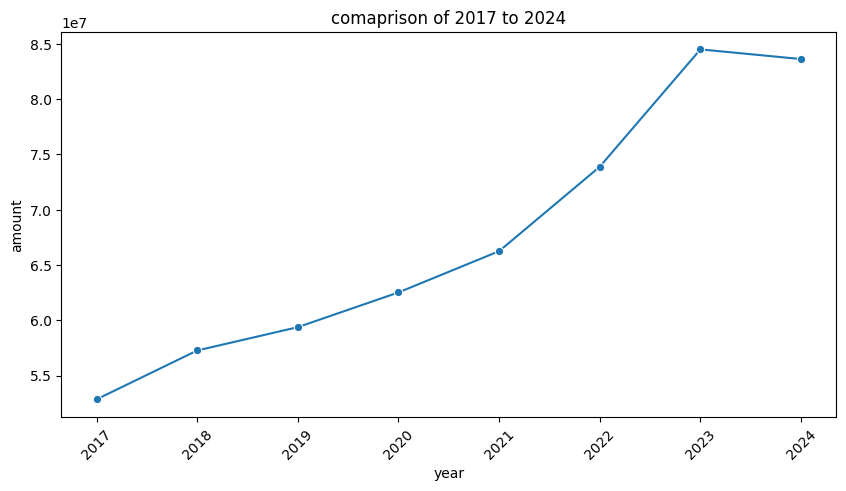

In [45]:
#comparison of 2017 with 2024
two_year_compare=df[df['year'].isin([2017,2018,2019,2020,2021,2022,2023,2024])]

amount_totals = two_year_compare.groupby(['year'])['amount'].sum().reset_index()

plt.figure(figsize=(10,5))

sns.lineplot(data=amount_totals, x='year',y='amount', palette='rocket', marker='o' )

plt.xticks(rotation=45)
plt.xlabel('year')
plt.ylabel('amount')
plt.title('comaprison of 2017 to 2024')

plt.show()

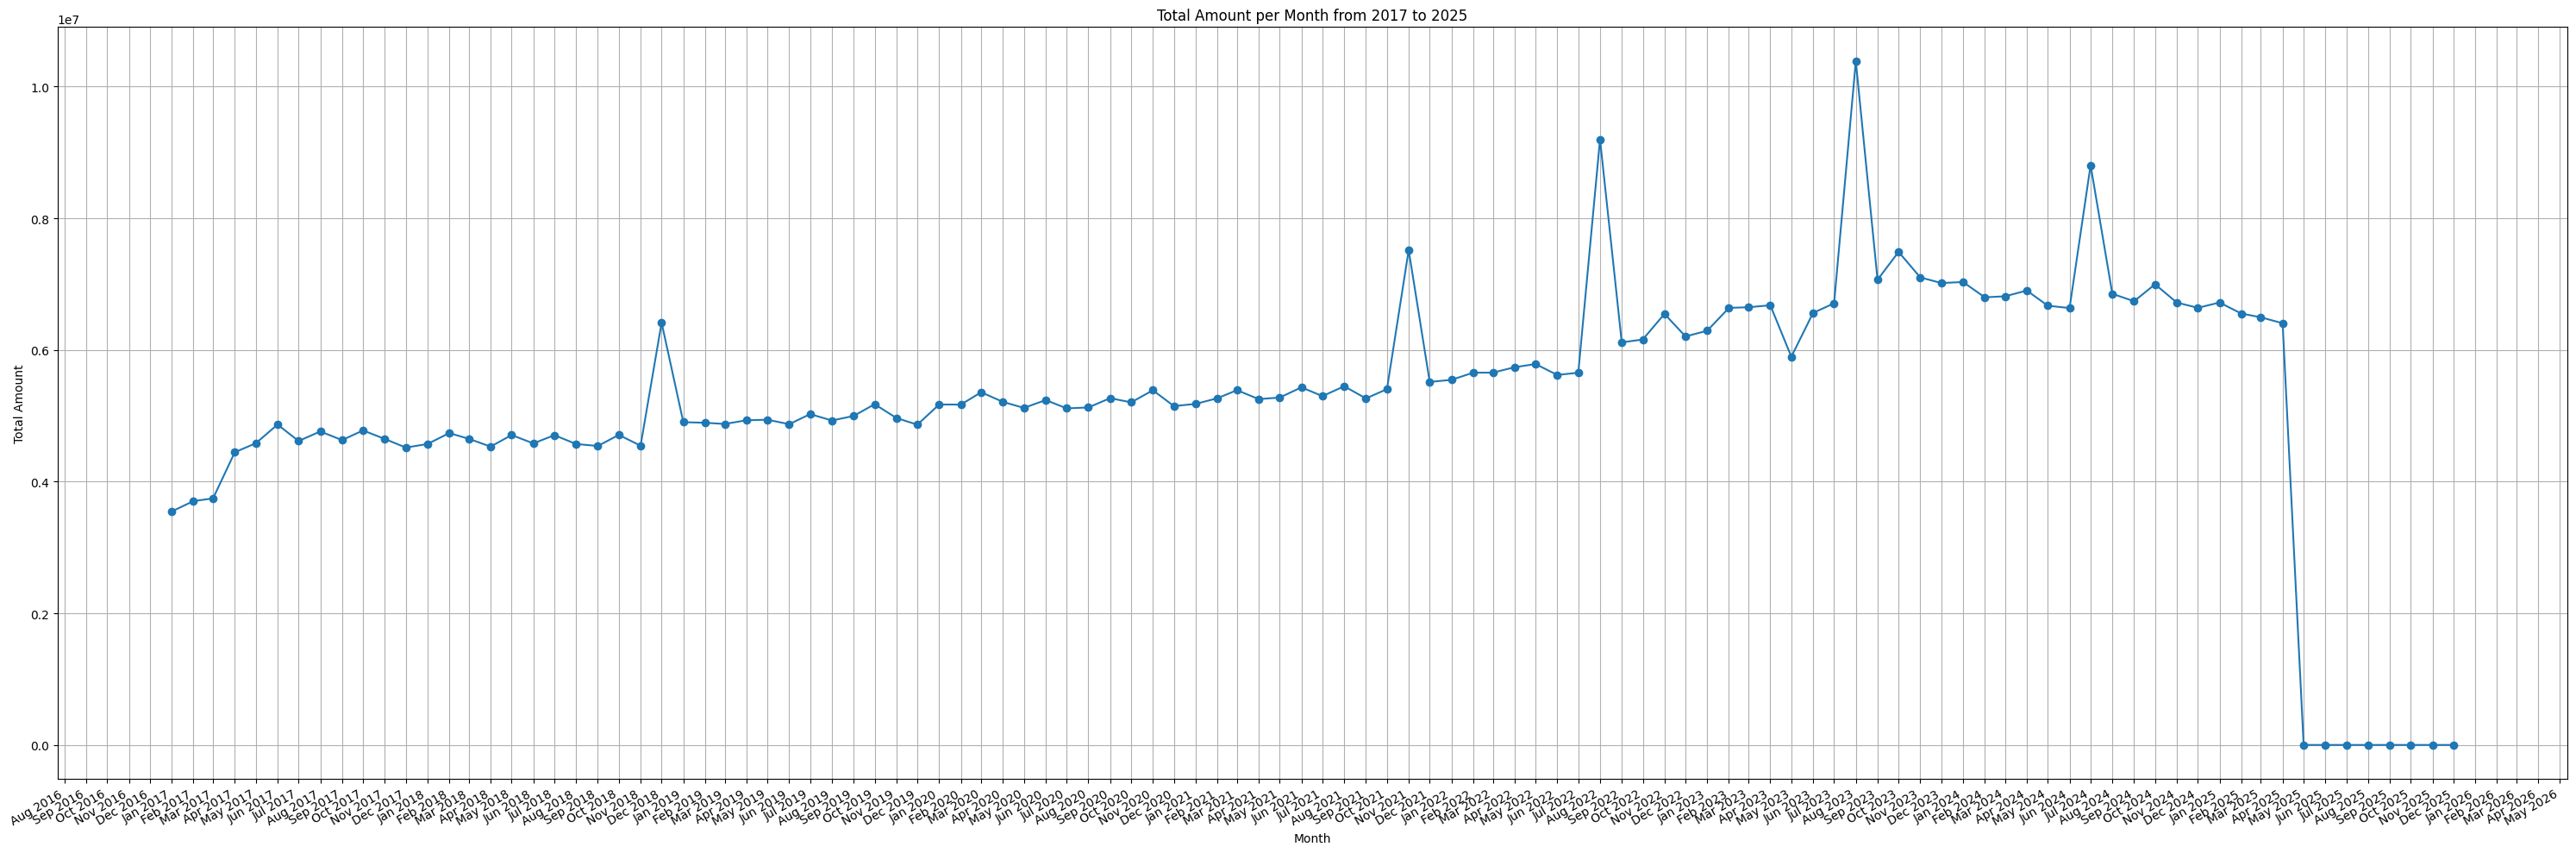

In [46]:
#all years continuous graph
df_filtered = df[(df['year'] >= 2017) & (df['year'] <= 2025)].copy()
# Convert payperiod to numeric (float), coerce errors if any bad values
df_filtered['payperiod'] = pd.to_numeric(df_filtered['payperiod'], errors='coerce')

# Then convert to int
df_filtered['month'] = df_filtered['payperiod'].astype('Int64')  # 'Int64' allows NaNs if any

# Create a datetime column for the first day of each month
df_filtered['date'] = pd.to_datetime(dict(year=df_filtered['year'], month=df_filtered['month'], day=1))

# Group by the date and sum amount
monthly_totals = df_filtered.groupby('date')['amount'].sum()

import matplotlib.dates as mdates

# ... your code up to monthly_totals ...

# Ensure a continuous monthly index (start-of-month) from 2017-01 to 2025-12
full_idx = pd.date_range('2017-01-01', '2025-12-01', freq='MS')
monthly_totals = monthly_totals.reindex(full_idx, fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(monthly_totals.index, monthly_totals.values, marker='o', linestyle='-')
ax.set_title('Total Amount per Month from 2017 to 2025')
ax.set_xlabel('Month')
ax.set_ylabel('Total Amount')
ax.grid(True)

# Show month names on the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))             # every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))             # e.g., "Jan 2019"
fig.autofmt_xdate()                                                     # rotate + align nicely

plt.tight_layout()
plt.show()



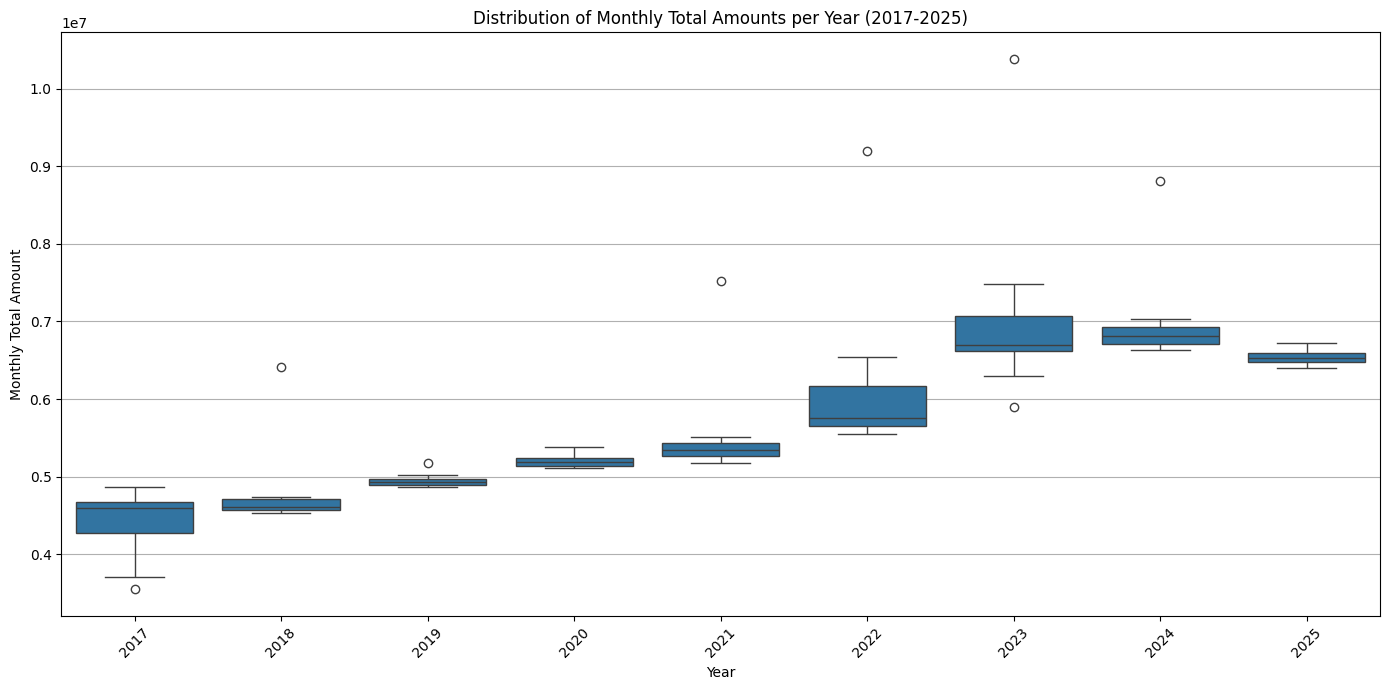

In [47]:
#boxplots
# We already have df_filtered with 'year', 'month', and 'amount'

# Group by year and month, summing amounts
monthly_totals_per_year = df_filtered.groupby(['year', 'month'])['amount'].sum().reset_index()

# Plot boxplot: x = year, y = monthly total amounts
plt.figure(figsize=(14, 7))
sns.boxplot(data=monthly_totals_per_year, x='year', y='amount')

plt.title('Distribution of Monthly Total Amounts per Year (2017-2025)')
plt.xlabel('Year')
plt.ylabel('Monthly Total Amount')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [48]:
#delete the # when im ready to save this as a new document
#df.to_csv("cleaned_data.csv", index=False)


In [49]:
#most ocmmon cc doe august 2022
# Step 1: Filter for August 2022
# August = payperiod 5.0, year = 2022

august_2022 = df[(df['year'] == 2022) & (df['payperiod'] == 5.0)]

# Step 2: Find the most common CC
most_common_cc = august_2022['cc'].value_counts().idxmax()
count = august_2022['cc'].value_counts().max()

print(f"The most common CC in August 2022 is: {most_common_cc} (count: {count})")


The most common CC in August 2022 is: L091301 (count: 729)


In [50]:
#cc with the highest total amoun in august 2017
# Step 1: Filter for August 2017 (payperiod 5.0)
august_2017 = df[(df['year'] == 2017) & (df['payperiod'] == 5.0)]

# Step 2: Group by CC and sum the amounts
cc_totals = august_2017.groupby('cc')['amount'].sum()

# Step 3: Get the CC with the highest total amount
top_cc = cc_totals.idxmax()
top_amount = cc_totals.max()

print(f"The CC with the highest total amount in August 2017 is: {top_cc} (Total Amount: {top_amount:,.2f})")


The CC with the highest total amount in August 2017 is: L091301 (Total Amount: 230,246.17)


In [51]:
#TOP 5 cc with highest totals
print(cc_totals.sort_values(ascending=False).head(5))


cc
L091301    230246.17
L381500    149464.61
L041702    135654.29
L511500    123667.95
L131500    102001.76
Name: amount, dtype: float64
